In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from transformers import pipeline

In [2]:
# Load AI model for content generation and doubt resolution
llm = pipeline("text2text-generation", model="google/flan-t5-base", temperature = 0.5)


Device set to use cpu


In [20]:
# 1️⃣ Student Assessment & Adaptive Learning Agent
class AssessmentAgent:
    def __init__(self):
        self.topics = {"Math": 0, "Science": 0, "History": 0}
    
    def assess_student(self):
        print("Starting Student Assessment...\n")
        for subject in self.topics:
            self.topics[subject] = random.randint(1, 10)  # RANDOM score out of 10
        print("Assessment Results:", self.topics)
        return self.topics
    
    def suggest_learning_path(self):
        weak_topics = [topic for topic, score in self.topics.items() if score < 5] # If score<5 it is a weak subject
        return weak_topics if weak_topics else ["Advanced Learning in all topics"]


In [21]:
# 2️⃣ Content Generation & Doubt Resolution Agent
class ContentAgent:
    def generate_lesson(self, topic):
        print(f"\nGenerating lesson for {topic}...")
        response = llm(f"Explain {topic} in simple terms.")[0]['generated_text']
        return response
    
    def answer_doubt(self, question):
        print("\nAnswering doubt...")
        response = llm(f"Answer this question: {question}")[0]['generated_text']
        return response


In [22]:
# 3️⃣ Performance Monitoring & Engagement Agent
class MonitoringAgent:
    def __init__(self):
        self.progress = []
    
    def track_performance(self, assessment_scores):
        avg_score = np.mean(list(assessment_scores.values()))
        self.progress.append(avg_score)
        print(f"\nCurrent Progress Score: {avg_score}/10")
    
    def plot_progress(self):
        plt.plot(self.progress, marker='o', linestyle='-')
        plt.xlabel("Sessions")
        plt.ylabel("Average Score")
        plt.title("Student Learning Progress")
        plt.show()

In [23]:
# Simulating the AI Tutor System
assessment_agent = AssessmentAgent()
content_agent = ContentAgent()
monitoring_agent = MonitoringAgent()

In [24]:

# Step 1: Assess Student
scores = assessment_agent.assess_student()
learning_path = assessment_agent.suggest_learning_path()
print("Suggested Learning Path:", learning_path)


Starting Student Assessment...

Assessment Results: {'Math': 10, 'Science': 5, 'History': 1}
Suggested Learning Path: ['History']


In [25]:
# Step 2: Generate Lessons
for topic in learning_path:
    print(content_agent.generate_lesson(topic))



Generating lesson for History...
History is a collection of events that occurred during the past century.


In [26]:
# Step 3: Answer Doubts
user_doubt = "What is photosynthesis?"
print(content_agent.answer_doubt(user_doubt))


Answering doubt...
Photosynthesis is the process of converting light energy into light energy by photosynthesis.



Current Progress Score: 5.333333333333333/10


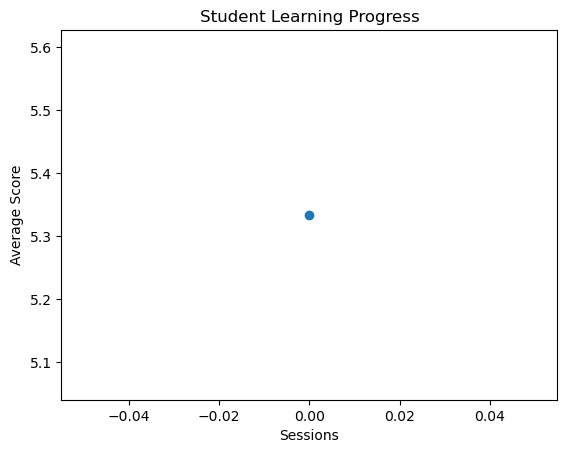

In [10]:
# Step 4: Monitor Progress
monitoring_agent.track_performance(scores)
monitoring_agent.plot_progress()
